<a href="https://colab.research.google.com/github/mini3713/mini3713/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0/HG_05_%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**5 트리 알고리즘**
============================

5-1. 결정 트리
==================
> 레드 와인과 화이트 와인 표시가 누락된 와인들을 결정트리 알고리즘을 사용하여 분류해 보도록 한다.

In [1]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [2]:
# 데이터프레임 각 열의 데이터 타입과, 누락된 데이터 유무를 확인
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [3]:
# 각 열에 대한 통계 
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [4]:
# 판다스 데이터프레임을 넘파이 배열로 변환
data = wine[['alcohol', 'sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

In [5]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [6]:
# 입력데이터 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

> **설명하기 쉬운 모델과 어려운 모델**  
> * 로지스틱 회귀 모델과 같은 대부분의 머신러닝 모델은 학습의 결과를 설명하기 어렵다. 예를들면 모델이 왜 특정 계수와 절편값을 학습했는지 등을 이해하기 어렵다.  
> * 하지만 결정트리는 스무고개와 비슷하기 때문에 비교적 설명하기 쉬운 모델이다.


In [7]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


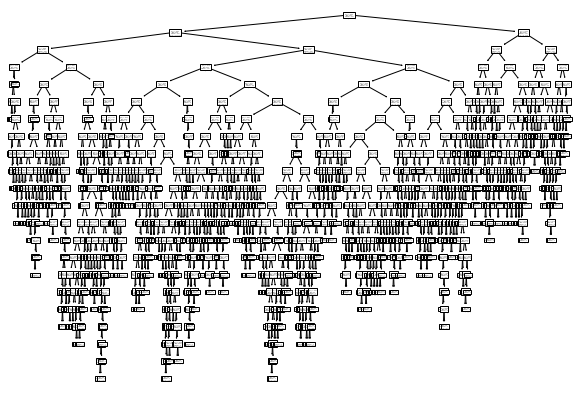

In [8]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

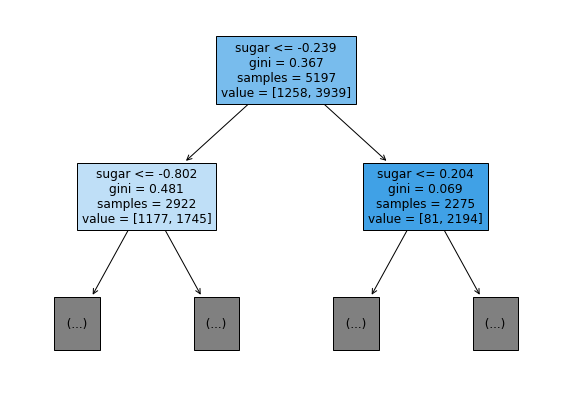

In [9]:
# 노드가 어떤 특성으로 나뉘는지 확인하기 위해 트리의 깊이를 제한해서 출력
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

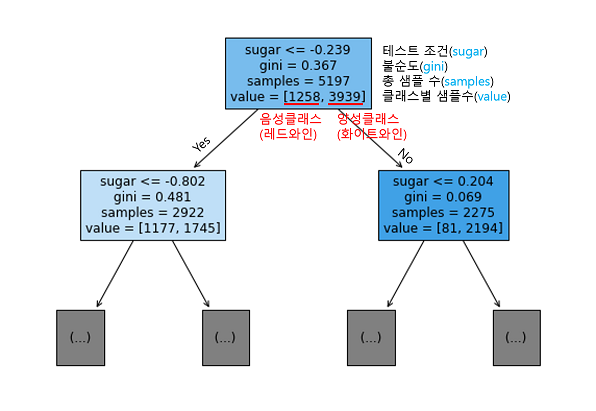

###**지니 불순도 (gini impurity)**
> $$ gini = 1 - (음성클래스비율^{2} + 양성클래스비율^{2}) $$
>
> * 100개의 샘플이 있는 어떤 노드의 두 클래스 비율이 정확히 1/2 이면?
>
> $$ 1 - ((50/100)^{2} + 50/100)^{2}) = 0.5 $$
>
> * 노드에 하나의 클래스만 있다면?  
>
> $$ 1 - ((0/100)^{2} + (100/100)^{2}) = 0 $$


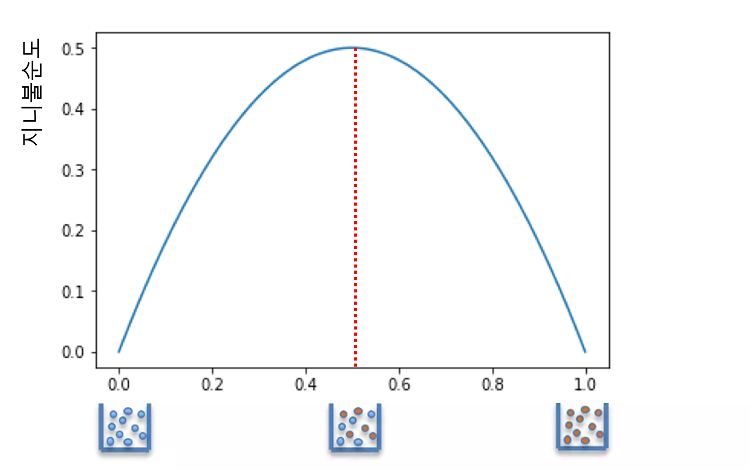

> **불순도의 차이**
>
> $$ 불순도의 차이 = 부모의 불순도 - {(왼쪽노드 샘플수/부모샘플수) * 왼쪽노드 불순도} - {(오른쪽노드 샘플수/부모샘플수) * 오른쪽노드 불순도} $$
>
> 불순도의 차이는 **정보이득**(information gain) 이라고 하며, 결정트리모델은 정보이득이 최대가 되는 방향으로 학습한다

In [12]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


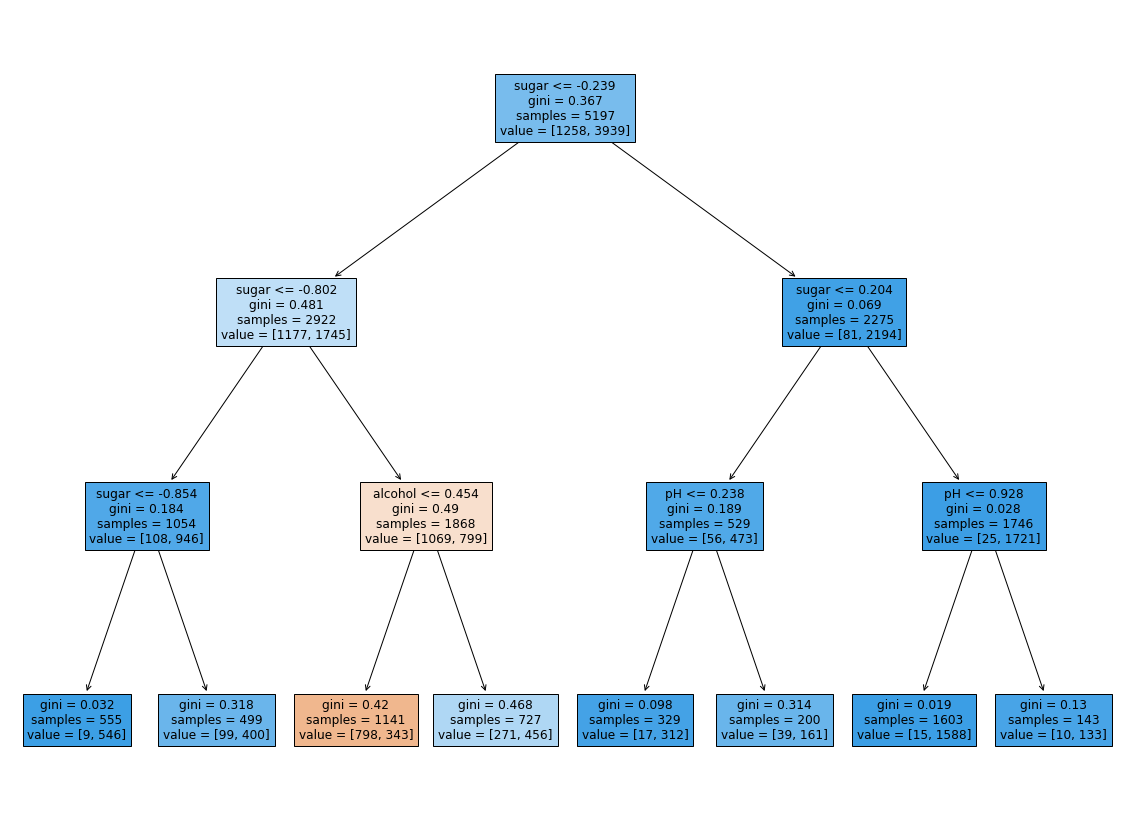

In [13]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [14]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616
